### Precision/Recall Replication
* Zweck: Replikation des Kapitel "Classification" aus dem Paper "Predicting Vulnerable Software Components"
* Matrix: Aktueller Stand "current" des mozilla-central Repository
* Features: Includes, Function Calls
* Modell: Support Vector Machine Classifier

#### Setup
* Training-Set/Test-Set: Stratified sampling auf einer Matrix (2/3 : 1/3)

#### Results
Das Skript macht auf n verschiedenen Datensets eine Vorhersage und berechnet Precision und Recall. Diese werden im Scatterplot dargestellt und der deren Durchschnitt im print.
* Resultat Plot: Scatterplot Precision vs. Recall
* Resultat Print: Durchschnitt Precision vs. Recall über n Datensets

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
Average of 40 Experiments:
Precision: 0.67
Recall: 0.38


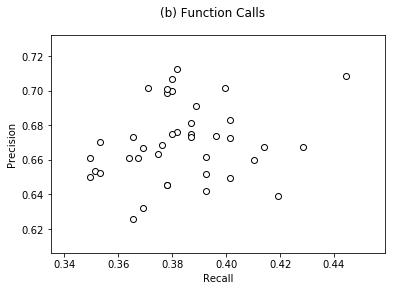

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from imports.matrix_helper import MatrixHelper
from imports.prediction_helper import PredictionHelper
from sklearn.metrics import precision_recall_curve

matrix_helper = MatrixHelper()
experiments_count = 40

# Read pickle
matrices = matrix_helper.load_from_parse('data/matrices/matrix_cla_calls_current.pickle')

precision_list = []
recall_list = []
for i in range(experiments_count):
    # Instantiate Prediction Helper Class and predict values for compare matrix with an SVM
    prediction_helper = PredictionHelper()
    prediction_helper.calculate_validation_compare_matrix(matrices, sampling_factor=(2.0/3), prediction_type='LinearSVC', crop_matrix=False)
    compare_matrix = prediction_helper.get_compare_matrix()

    # Compute Precision-Recall
    precision, recall, thresholds = precision_recall_curve(np.array(compare_matrix[:, 2], dtype='f'), np.array(compare_matrix[:, 1], dtype='f'))

    precision_list.append(precision[1])
    recall_list.append(recall[1])
    print(i)


# plot
fig = plt.figure()
plt.scatter(recall_list, precision_list, edgecolor='black', linewidth='1', facecolor='white')
fig.suptitle('(b) Function Calls')
plt.xlabel('Recall')
plt.ylabel('Precision')
fig.savefig('outputs/precision-recall-calls-current.pdf')

# print
precision_average = sum(precision_list) / float(len(precision_list))
recall_average = float(sum(recall_list)) / len(recall_list)
print('Average of {} Experiments:'.format(experiments_count))
print('Precision: {:.2f}'.format(precision_average))
print('Recall: {:.2f}'.format(recall_average))